In [1]:
# Importar las librerías necesarias

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Cargar el dataset

In [4]:
df = pd.read_csv('C:\\Users\\Dragu\\Desktop\\heart_attack_risk_dataset.csv')

In [5]:
# Mostrar información del dataset

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [7]:
# Convertir variables categóricas a numéricas

In [8]:
encoder = LabelEncoder()
categorical_cols = ['Gender', 'Physical_Activity_Level', 'Stress_Level',
                    'Chest_Pain_Type', 'Thalassemia', 'ECG_Results']

In [9]:
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [10]:
# Convertir la columna objetivo

In [11]:
df['Heart_Attack_Risk'] = encoder.fit_transform(df['Heart_Attack_Risk'])

In [12]:
# Separar características (X) y etiquetas (y)

In [13]:
X = df.drop('Heart_Attack_Risk', axis=1)
y = df['Heart_Attack_Risk']

In [14]:
# Dividir los datos en entrenamiento y prueba

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print("El tamaño de X_train es: ", X_train.shape)
print("El tamaño de X_test es: ", X_test.shape)

El tamaño de X_train es:  (40000, 19)
El tamaño de X_test es:  (10000, 19)


In [17]:
# Escalar las características

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Crear el modelo de regresión logística

In [20]:
model = LogisticRegression(max_iter=1000, random_state=42)

In [21]:
# Entrenar el modelo

In [22]:
model.fit(X_train, y_train)
print("El modelo ha sido entrenado con éxito.")

El modelo ha sido entrenado con éxito.


In [23]:
# Random forest

In [24]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))

Accuracy (Random Forest): 0.494


In [25]:
# Predecir los valores del conjunto de prueba

In [26]:
y_pred = model.predict(X_test)

In [27]:
# Evaluar el modelo

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.5083
Precision (macro): 0.16943333333333332
Recall (macro): 0.3333333333333333

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1987
           1       0.51      1.00      0.67      5083
           2       0.00      0.00      0.00      2930

    accuracy                           0.51     10000
   macro avg       0.17      0.33      0.22     10000
weighted avg       0.26      0.51      0.34     10000



C:\Users\Dragu\PycharmProjects\RetoMachineLearning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dragu\PycharmProjects\RetoMachineLearning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dragu\PycharmProjects\RetoMachineLearning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [29]:
# Visualizar la matriz de correlación

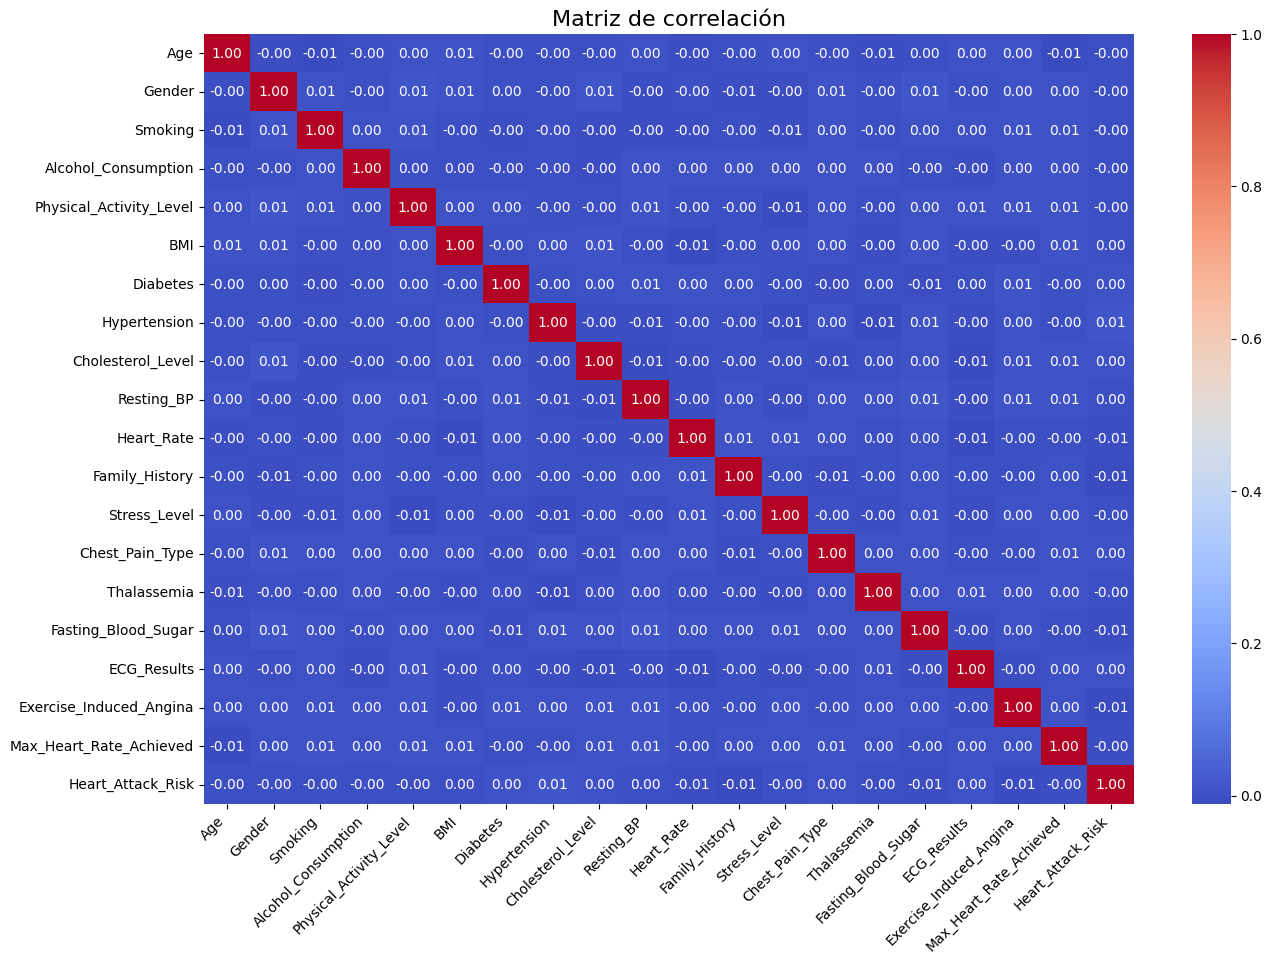

In [31]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Matriz de correlación", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.show()